# dr

## Exam2: abc

### data

In [67]:
txt = list('abc')*100
txt[:10]

['a', 'b', 'c', 'a', 'b', 'c', 'a', 'b', 'c', 'a']

In [68]:
txt_x = txt[:-1]
txt_y = txt[1:]

In [69]:
txt_x[:5],txt_y[:5]

(['a', 'b', 'c', 'a', 'b'], ['b', 'c', 'a', 'b', 'c'])

### sol

In [70]:
mapping = {'a':0,'b':1,'c':2}
x = torch.tensor(f(txt_x,mapping))
y = torch.tensor(f(txt_y,mapping))
x[:5],y[:5]

(tensor([0, 1, 2, 0, 1]), tensor([1, 2, 0, 1, 2]))

In [71]:
net = torch.nn.Sequential(
    torch.nn.Embedding(num_embeddings=3,embedding_dim=1),
    torch.nn.Tanh(),
    torch.nn.Linear(in_features=1,out_features=3)
)
loss_fn = torch.nn.CrossEntropyLoss()
optimizr = torch.optim.Adam(net.parameters())

In [72]:
net(x).shape

torch.Size([299, 3])

In [73]:
for epoc in range(5000):
    ## 1
    yhat = net(x)
    ## 2 
    loss = loss_fn(yhat,y)
    ## 3 
    loss.backward()
    ## 4 
    optimizr.step()
    optimizr.zero_grad()

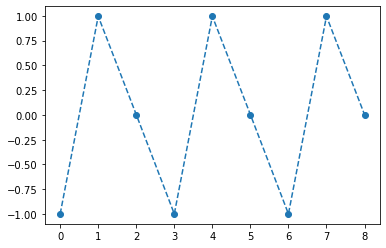

In [74]:
plt.plot(net[0:2](x[:9]).data,'--o')

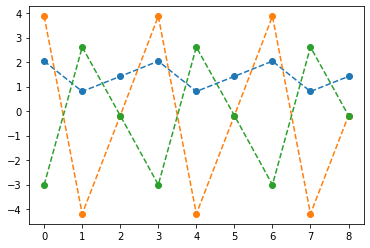

In [75]:
plt.plot(net[0:3](x[:9]).data,'--o')

- 억지로 맞추고있긴한데 파라메터가 부족해보인다. 

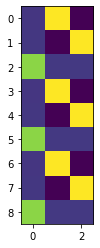

In [76]:
plt.imshow(soft(net(x[:9])).data)

## Exam3: abcd

### data

In [77]:
txt = list('abcd')*100
txt[:10]

['a', 'b', 'c', 'd', 'a', 'b', 'c', 'd', 'a', 'b']

In [78]:
txt_x = txt[:-1]
txt_y = txt[1:]

In [79]:
txt_x[:5],txt_y[:5]

(['a', 'b', 'c', 'd', 'a'], ['b', 'c', 'd', 'a', 'b'])

### sol -- 실패

In [80]:
mapping = {'a':0,'b':1,'c':2,'d':3}
x = torch.tensor(f(txt_x,mapping))
y = torch.tensor(f(txt_y,mapping))
x[:5],y[:5]

(tensor([0, 1, 2, 3, 0]), tensor([1, 2, 3, 0, 1]))

In [81]:
net = torch.nn.Sequential(
    torch.nn.Embedding(num_embeddings=4,embedding_dim=1),
    torch.nn.Tanh(),
    torch.nn.Linear(in_features=1,out_features=4)
)
loss_fn = torch.nn.CrossEntropyLoss()
optimizr = torch.optim.Adam(net.parameters())

In [82]:
net(x).shape

torch.Size([399, 4])

In [83]:
for epoc in range(5000):
    ## 1
    yhat = net(x)
    ## 2 
    loss = loss_fn(yhat,y)
    ## 3 
    loss.backward()
    ## 4 
    optimizr.step()
    optimizr.zero_grad()

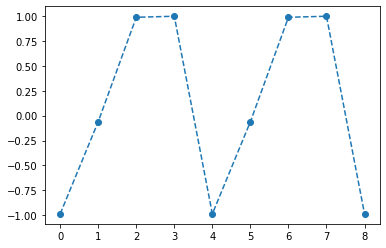

In [84]:
plt.plot(net[0:2](x[:9]).data,'--o')

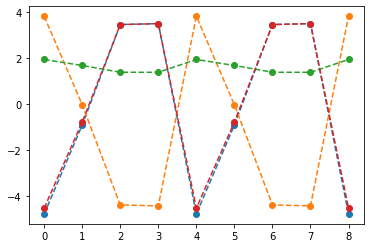

In [85]:
plt.plot(net[0:3](x[:9]).data,'--o')

- 이제 못함

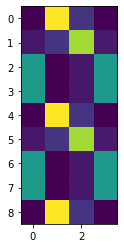

In [86]:
plt.imshow(soft(net(x[:9])).data)

### sol -- 성공

In [87]:
mapping = {'a':0,'b':1,'c':2,'d':3}
x = torch.tensor(f(txt_x,mapping))
y = torch.tensor(f(txt_y,mapping))
x[:5],y[:5]

(tensor([0, 1, 2, 3, 0]), tensor([1, 2, 3, 0, 1]))

In [88]:
net = torch.nn.Sequential(
    torch.nn.Embedding(num_embeddings=4,embedding_dim=2),
    torch.nn.Tanh(),
    torch.nn.Linear(in_features=2,out_features=4)
)
loss_fn = torch.nn.CrossEntropyLoss()
optimizr = torch.optim.Adam(net.parameters())

In [89]:
net(x).shape

torch.Size([399, 4])

In [90]:
for epoc in range(5000):
    ## 1
    yhat = net(x)
    ## 2 
    loss = loss_fn(yhat,y)
    ## 3 
    loss.backward()
    ## 4 
    optimizr.step()
    optimizr.zero_grad()

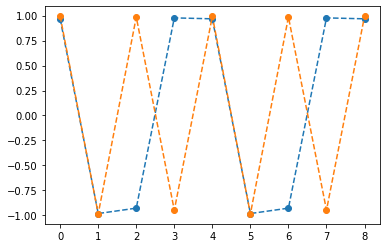

In [91]:
plt.plot(net[0:2](x[:9]).data,'--o')

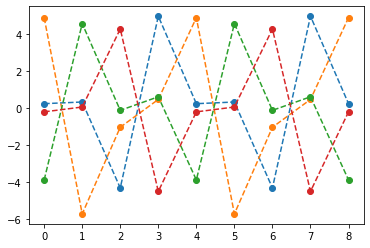

In [92]:
plt.plot(net[0:3](x[:9]).data,'--o')

- 성공

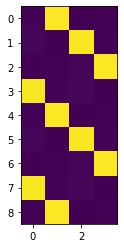

In [93]:
plt.imshow(soft(net(x[:9])).data) ## 깔끔한 성공

## Exam4: AbAcAd

### data

In [94]:
txt = list('AbAcAd')*100
txt[:10]

['A', 'b', 'A', 'c', 'A', 'd', 'A', 'b', 'A', 'c']

In [95]:
txt_x = txt[:-1]
txt_y = txt[1:]

In [96]:
txt_x[:5],txt_y[:5]

(['A', 'b', 'A', 'c', 'A'], ['b', 'A', 'c', 'A', 'd'])

### sol -- 예상한 실패

In [97]:
mapping = {'A':0,'b':1,'c':2,'d':3}
x = torch.tensor(f(txt_x,mapping))
y = torch.tensor(f(txt_y,mapping))
x[:5],y[:5]

(tensor([0, 1, 0, 2, 0]), tensor([1, 0, 2, 0, 3]))

In [98]:
net = torch.nn.Sequential(
    torch.nn.Embedding(num_embeddings=4,embedding_dim=1),
    torch.nn.Tanh(),
    torch.nn.Linear(in_features=1,out_features=4)
)
loss_fn = torch.nn.CrossEntropyLoss()
optimizr = torch.optim.Adam(net.parameters())

In [99]:
net(x).shape

torch.Size([599, 4])

In [100]:
for epoc in range(5000):
    ## 1
    yhat = net(x)
    ## 2 
    loss = loss_fn(yhat,y)
    ## 3 
    loss.backward()
    ## 4 
    optimizr.step()
    optimizr.zero_grad()

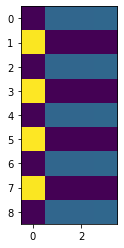

In [101]:
plt.imshow(soft(net(x[:9])).data) 

- b,c,d는 사실 소문자라는 측면에서 공통점이 있음 
- b,c,d는 퉁쳐서 한 문자로 취급

### sol -- 예상못한실패

In [102]:
mapping = {'A':0,'b':1,'c':2,'d':3}
x = torch.tensor(f(txt_x,mapping))
y = torch.tensor(f(txt_y,mapping))
x[:5],y[:5]

(tensor([0, 1, 0, 2, 0]), tensor([1, 0, 2, 0, 3]))

In [103]:
net = torch.nn.Sequential(
    torch.nn.Embedding(num_embeddings=4,embedding_dim=2),
    torch.nn.Tanh(),
    torch.nn.Linear(in_features=2,out_features=4)
)
loss_fn = torch.nn.CrossEntropyLoss()
optimizr = torch.optim.Adam(net.parameters())

In [104]:
net(x).shape

torch.Size([599, 4])

In [105]:
for epoc in range(5000):
    ## 1
    yhat = net(x)
    ## 2 
    loss = loss_fn(yhat,y)
    ## 3 
    loss.backward()
    ## 4 
    optimizr.step()
    optimizr.zero_grad()

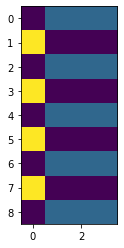

In [106]:
plt.imshow(soft(net(x[:9])).data) ## 한계상황

- 파라메터 더 많이 써봤자 안될듯 

### 조금 낯선 표현 

In [107]:
## net 
i2h = torch.nn.Embedding(num_embeddings=4,embedding_dim=2)
    # 4 is input size, 2 is hidden size 
tanh = torch.nn.Tanh()
h2o = torch.nn.Linear(in_features=2,out_features=4)
    # 2 is hidden size, 4 is output size 
    
## loss_fn
loss_fn = torch.nn.CrossEntropyLoss()
## optimizr 
# optimizr = torch.optim.Adam(net.parameters())

`-` step1~2

(for문을 이용하여 loss구하기)

In [108]:
T = len(x)

In [109]:
loss = 0 
for t in range(T):
    x_t = x[[t]]
    y_t = y[[t]]
    h_t = tanh(i2h(x_t))
    yhat_t = h2o(h_t) # softmax 전 
    loss += loss_fn(yhat_t,y_t) 
loss = loss/T
loss

tensor(1.2807, grad_fn=<DivBackward0>)

(하던대로 loss구하기)

In [110]:
net = torch.nn.Sequential(i2h,tanh,h2o)
loss_fn(net(x),y)

tensor(1.2807, grad_fn=<NllLossBackward0>)

`-` step3

In [111]:
loss.backward()

`-` step4

In [112]:
# 
# optimizr = torch.optim.Adam(net.parameters()) <-- 여기서 막힌다..

---

완성하려면?

`-` step1~2

In [113]:
class RNN0(torch.nn.Module): ## RNN을 이해하기 위한 네트워크, 실제로 순환신경망은 아님
    def __init__(self):
        super().__init__()
        self.i2h = torch.nn.Embedding(num_embeddings=4,embedding_dim=2)
        self.tanh = torch.nn.Tanh()
        self.h2o = torch.nn.Linear(in_features=2,out_features=4)
    def forward(self,x_t):
        h_t = self.tanh(self.i2h(x_t))
        yhat_t = self.h2o(h_t)
        return yhat_t 

In [114]:
rnn0 = RNN0()

In [115]:
loss = 0 
for t in range(T):
    x_t = x[[t]]
    y_t = y[[t]]
    yhat_t = rnn0(x_t)
    loss += loss_fn(yhat_t,y_t) 
loss = loss/T
loss

tensor(1.5341, grad_fn=<DivBackward0>)

(잘 코딩했나 확인)

In [116]:
net = torch.nn.Sequential(
    rnn0.i2h,
    rnn0.tanh,
    rnn0.h2o
)

In [117]:
loss_fn(net(x),y)

tensor(1.5341, grad_fn=<NllLossBackward0>)

`-` step3

In [118]:
loss.backward()

`-` step4

In [119]:
optimizr = torch.optim.Adam(rnn0.parameters())

In [120]:
optimizr.step()
optimizr.zero_grad()

`-` 반복

In [121]:
torch.manual_seed(43052)
rnn0 = RNN0()
loss_fn = torch.nn.CrossEntropyLoss()
optimizr = torch.optim.Adam(rnn0.parameters())

In [122]:
for epoc in range(5):
    ## 1 ~ 2 
    loss = 0 
    for t in range(T):
        x_t = x[[t]]
        y_t = y[[t]]
        yhat_t = rnn0(x_t)
        loss += loss_fn(yhat_t,y_t) 
    loss = loss/T
    ## 3 
    loss.backward()
    ## 4 
    optimizr.step()
    optimizr.zero_grad()

In [123]:
rnn0(x)[0]

tensor([ 0.0196, -0.8627,  0.4574,  0.4201], grad_fn=<SelectBackward0>)

(확인)

In [124]:
torch.manual_seed(43052)
rnn0 = RNN0()
net = torch.nn.Sequential(
    rnn0.i2h,
    rnn0.tanh,
    rnn0.h2o
)
loss_fn = torch.nn.CrossEntropyLoss()
optimizr = torch.optim.Adam(net.parameters())

In [125]:
for epoc in range(5):
    ## 1 ~ 2 
    loss = loss_fn(net(x),y)
    ## 3 
    loss.backward()
    ## 4 
    optimizr.step()
    optimizr.zero_grad()

In [126]:
net(x)[0]

tensor([ 0.0196, -0.8627,  0.4574,  0.4201], grad_fn=<SelectBackward0>)

### sol -- 순환신경망

In [127]:
torch.manual_seed(43052)
rnn = torch.nn.RNN(input_size=4,hidden_size=2)
loss_fn = torch.nn.CrossEntropyLoss()
optimizr = torch.optim.Adam(rnn.parameters())

In [128]:
x.shape

torch.Size([599])

In [129]:
torch.nn.functional.one_hot(x).shape

torch.Size([599, 4])

In [130]:
torch.nn.functional.one_hot(x).float()[0]

tensor([1., 0., 0., 0.])

In [131]:
output,hnn = rnn(torch.nn.functional.one_hot(x).float()[[0]])

In [132]:
output.shape, hnn.shape

(torch.Size([1, 2]), torch.Size([1, 2]))